In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn


In [2]:
import keras

Using CNTK backend
e:\Anaconda3\envs\cntk-py36\lib\site-packages\keras\backend\cntk_backend.py:19: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [3]:
from keras import layers, models

## COMP 3132 -  Machine Learning with Python
__Week 10 lecture__

### [github.com/kamrik/ML2](https://github.com/kamrik/ML2)

### [slido.com/COMP3132](http://slido.com/COMP3132)


## Plan for today
 - Home assignment questions, deadline is tomorrow.
 - Dealing with clolor images
 - Visualizing what convnets learn - continued
 - Using a pretrained convnet

## Home assignment questions?
 - Due March 13
 - Start with the Yelp lab from previous term and newswires example from the book.
 

## ConvNets - recap
 - So far we used Dense layers
 - But for a picture of decent size like 1 MegaPixel that's too many connections
 - In ConvNets a unit is not connected to all units in the next layer

![ConvNet](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

## The whole model for MNIST

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Dealing with color
![Doge in color](https://static1.squarespace.com/static/54856bade4b0c4cdfb17e3c0/t/57edf15c9f74563967b893a2/1475211614805/?format=750w)

## Same as before, use all data in a small tile as inputs
![kitten convolved](https://static1.squarespace.com/static/54856bade4b0c4cdfb17e3c0/t/57eded61440243e527d2476a/1475210598551/?format=750w)

## Instead of 5x5 filters use 5x5x3 filters
![convolution with color](https://cdn-images-1.medium.com/max/1600/1*BSLjlJf31gj98ABJMCt3-g@2x.png)

## Cats vs Dog datset - section 5.2
![](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Dense part
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## MaxPooling
![maxpooling](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

## Data generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


## Data augmentations
![](https://cdn-images-1.medium.com/max/1600/1*C8hNiOqur4OJyEZmC7OnzQ.png)

## Visualizing neural nets

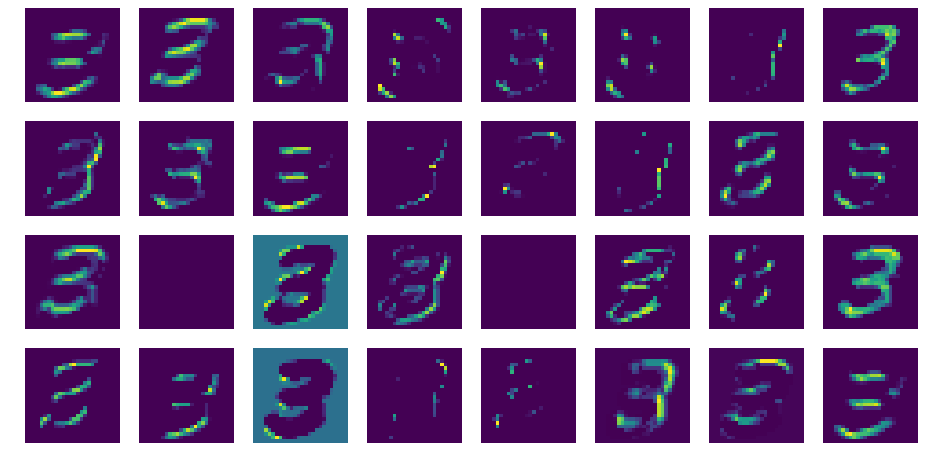

In [125]:
partial_model = models.Model(inputs=model.input, outputs=model.layers[0].output)
activations = partial_model.predict(train_images[:10])
plt.figure(figsize=(16,8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    act = activations[7][:,:,i]
    act[np.isnan(act)] = 0
    plt.imshow(act, cmap='viridis')
    plt.axis('off')
    plt.grid(False)


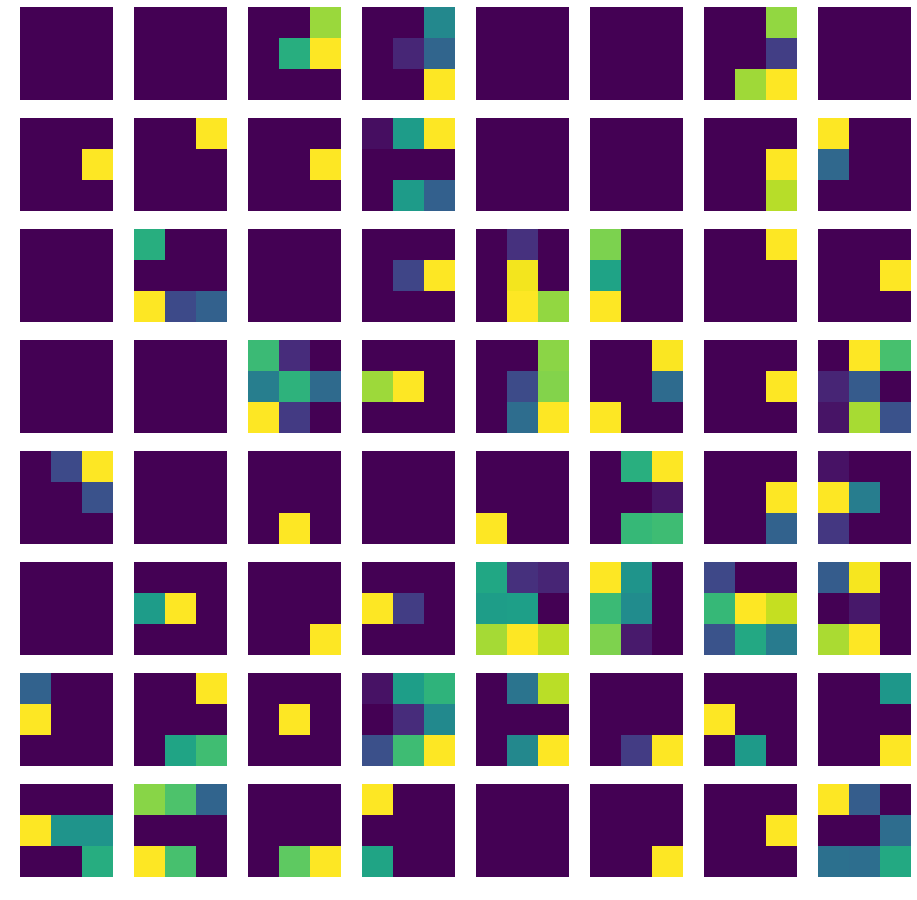

In [128]:
partial_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = partial_model.predict(train_images[:10])
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8, 8, i+1)
    act = activations[7][:,:,i]
    act[np.isnan(act)] = 0
    plt.imshow(act, cmap='viridis')
    plt.axis('off')
    plt.grid(False)

## Other visualizations - section 5.4
 - What part of the image made the network think it's an elephant
![elephant CAM](elephant_cam.jpg)

## What input image would maximize activation of a particular intermeidate unit
![patterns](max_patterns.png)

## Using pre-trained ConvNets

In [ ]:
model.save('mnist_digits.h5')
model.load_weights('mnist_digits.h5')

## Pre-trained models included with Keras
https://keras.io/applications/
 - Xception
 - VGG16
 - VGG19
 - ResNet, ResNetV2, ResNeXt
 - InceptionV3
 - InceptionResNetV2
 - MobileNet
 - MobileNetV2
 - DenseNet
 - NASNet


In [7]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=True)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
x = ... # Some image, appropriately shaped
probabilities = model.predict(x)

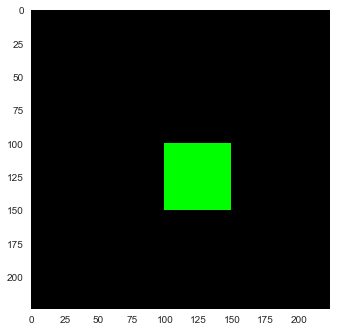

In [27]:
x = np.zeros((224, 224, 3), dtype=np.float32)
x[100:150, 100:150, 1] = 1
plt.imshow(x)
plt.grid(False)


In [24]:
probabilities = model.predict(x.reshape(1,224,224,3))
probabilities.shape

(1, 1000)

In [25]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(probabilities, top=3)

[[('n03788365', 'mosquito_net', 0.02124978),
  ('n03291819', 'envelope', 0.018960578),
  ('n15075141', 'toilet_tissue', 0.017113799)]]

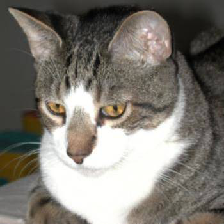

In [39]:
from keras.preprocessing import image
cat = image.load_img('../../Kaggle/DogsVsCats/all/train/cat.38.jpg', target_size=(224, 224))
cat

In [41]:
x2 = np.array(cat).reshape(1,224,224,3)
probabilities2 = model.predict(x2)
decode_predictions(probabilities2, top=3)

[[('n02124075', 'Egyptian_cat', 0.55333632),
  ('n02123045', 'tabby', 0.21845996),
  ('n02123597', 'Siamese_cat', 0.089783877)]]

## Transfer learning

![](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

In [31]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [32]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

notes
 - freezing the bottom layers
 - adding new layers on top
 

In [44]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [56]:
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [60]:
base_dir = r'E:\src\Kaggle\DogsVsCats\small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=True)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5


SystemError: <built-in function Trainer_train_minibatch> returned a result with an error set